In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.isnull().sum()#the dataset is clean

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#EDA

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
#LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
le.fit(insurance['sex']).classes_

array(['female', 'male'], dtype=object)

In [11]:
insurance['sex'] = le.transform(insurance['sex'])

In [12]:
le.fit(insurance['smoker']).classes_

array(['no', 'yes'], dtype=object)

In [13]:
insurance['smoker'] = le.transform(insurance['smoker'])

In [14]:
le.fit(insurance['region']).classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [15]:
insurance['region'] = le.transform(insurance['region'])

In [16]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
#visualisation

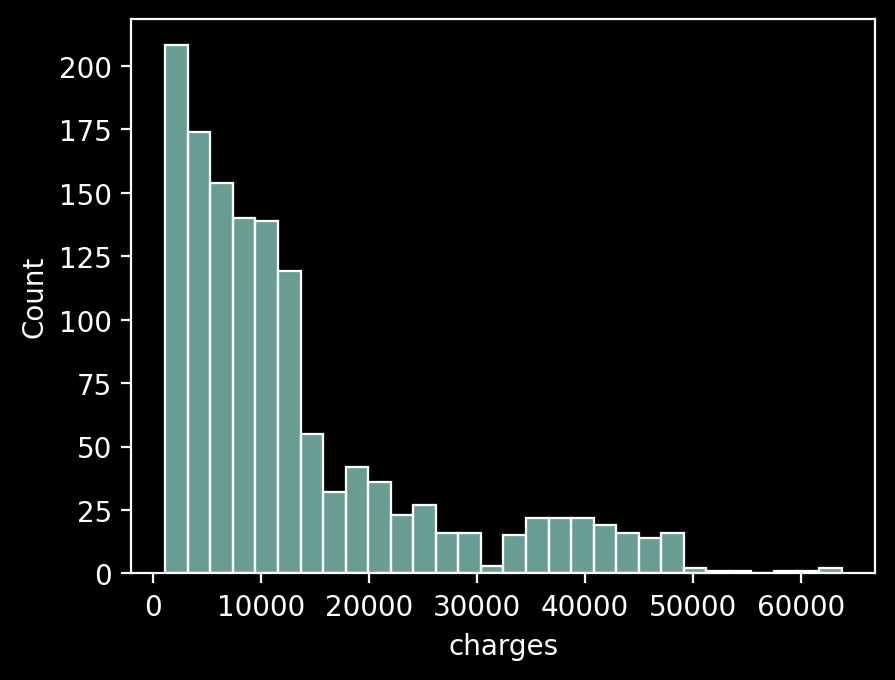

In [18]:
sns.histplot(data=insurance['charges']);

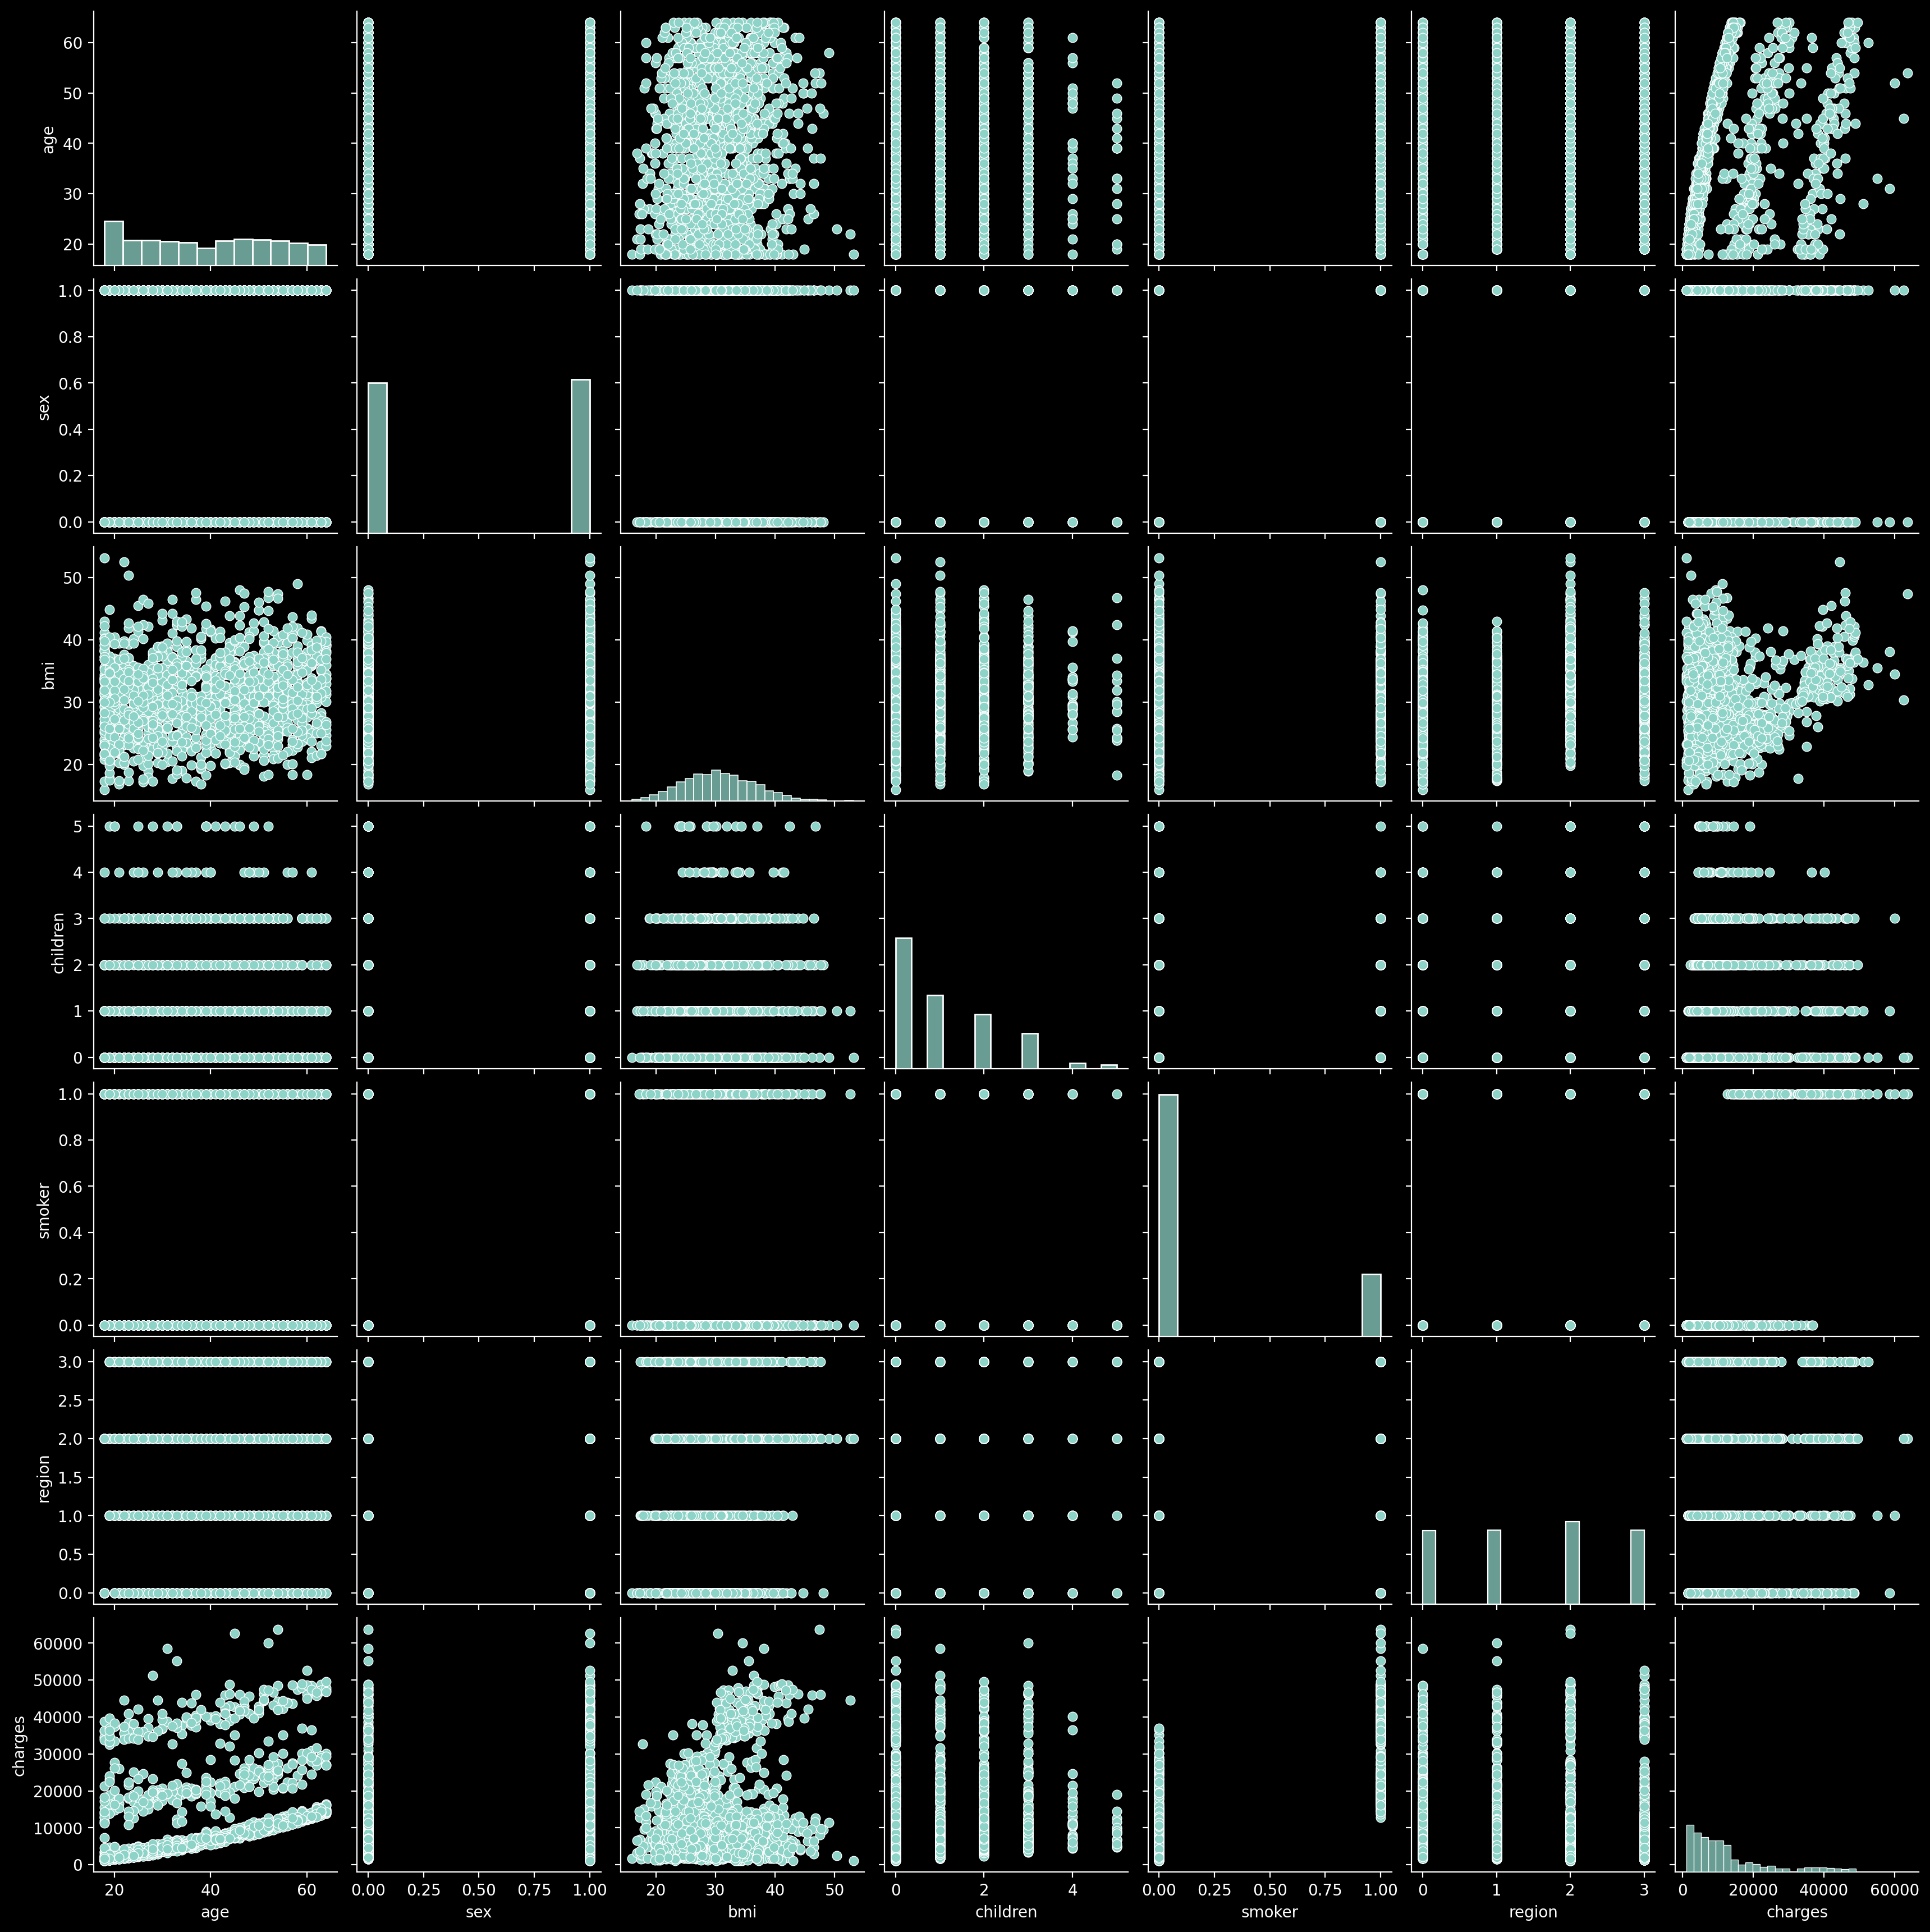

In [19]:
sns.pairplot(data=insurance);

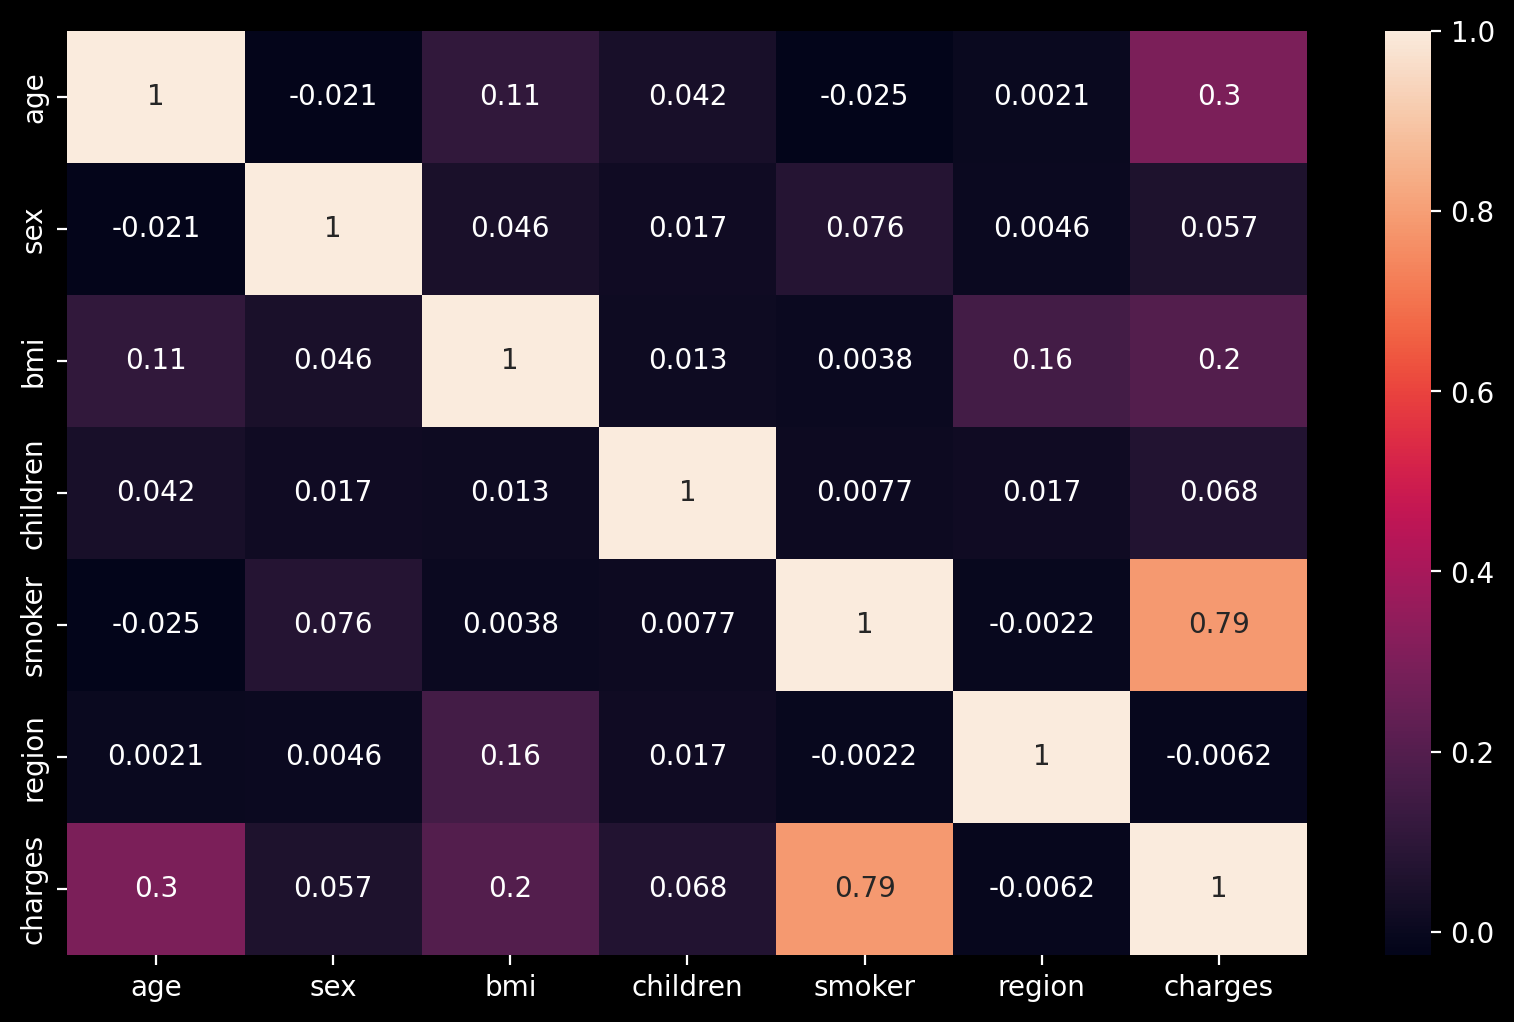

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(insurance.corr(),annot=True);

In [21]:
#The relationship between age and Charges

<Figure size 1000x600 with 0 Axes>

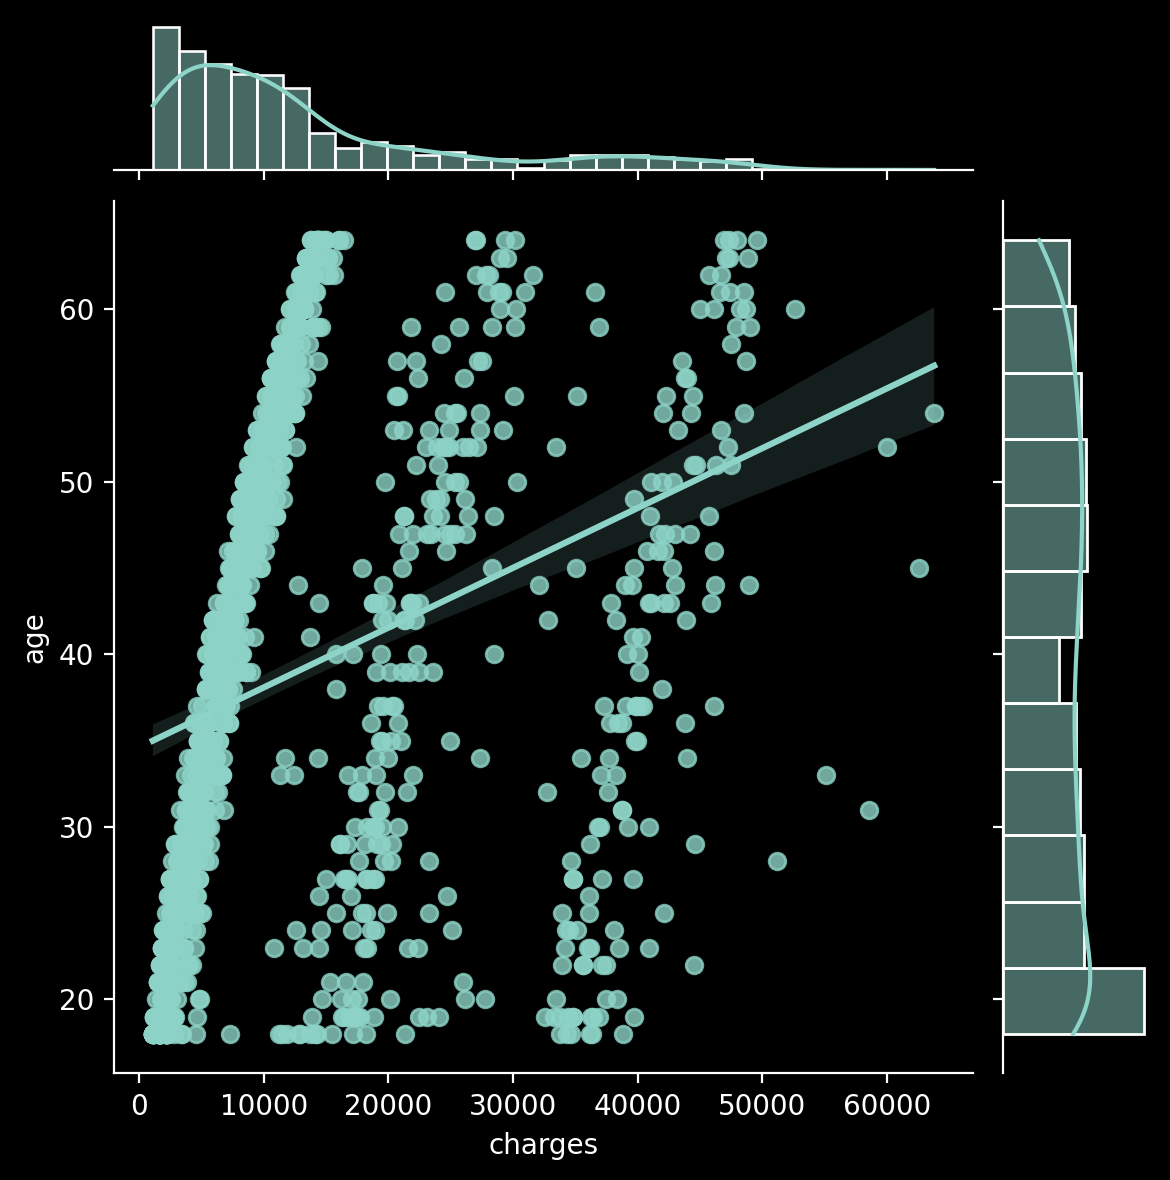

In [22]:
plt.figure(figsize=(10,6))
sns.jointplot(data=insurance,x='charges',y='age',kind='reg');

In [23]:
#The relationship between sex and Charges

<Figure size 1000x1000 with 0 Axes>

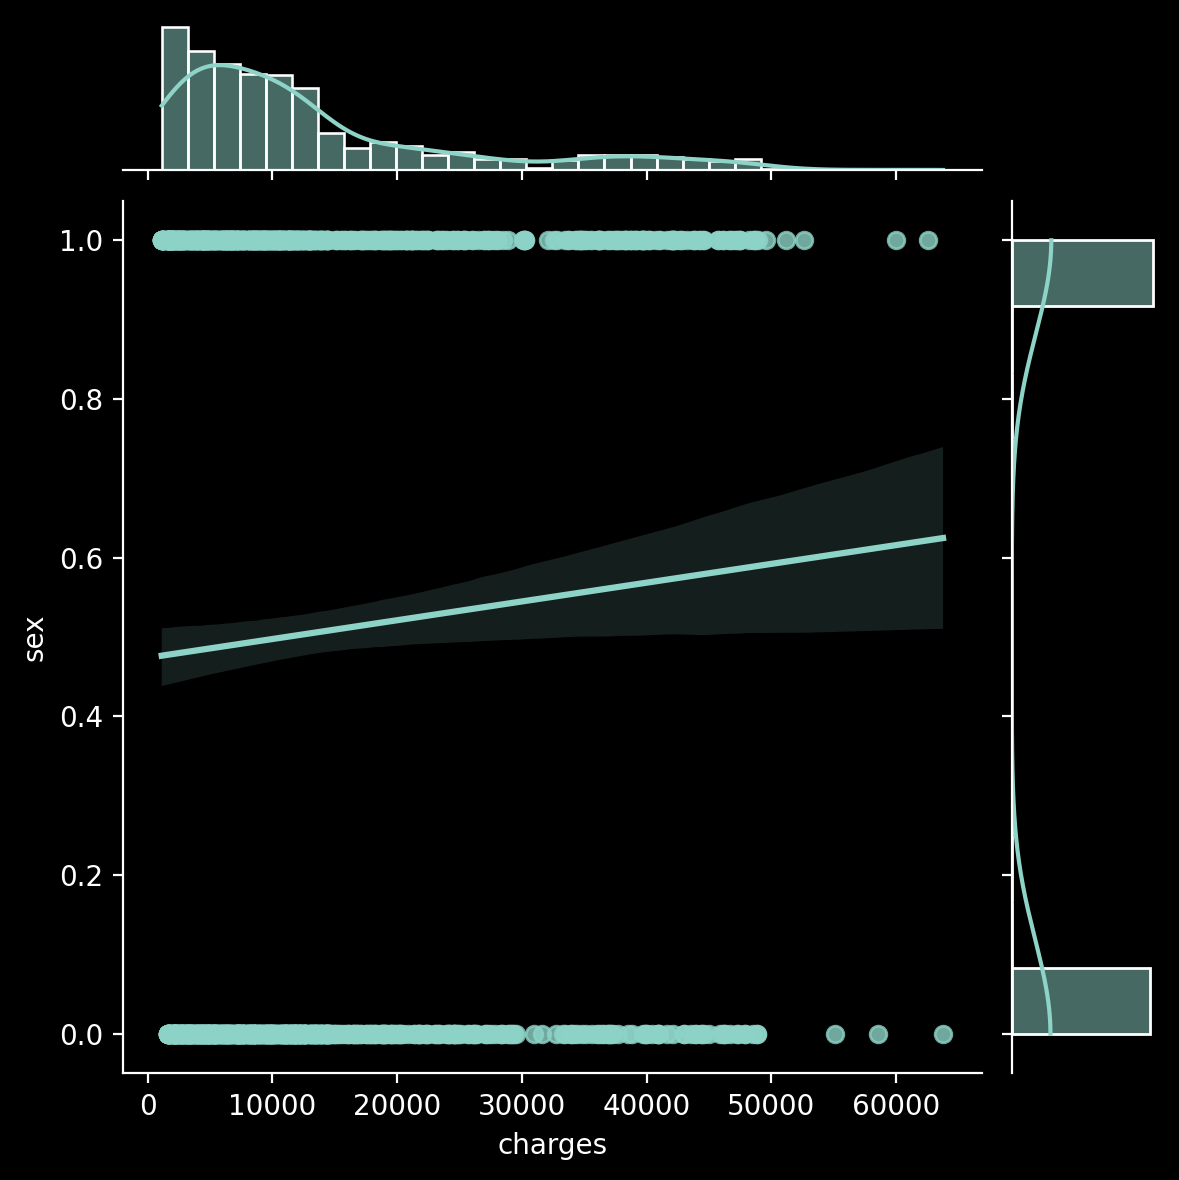

In [24]:
plt.figure(figsize=(10,10))
sns.jointplot(data=insurance,x='charges',y='sex',kind='reg');

In [25]:
#The relationship between bmi and Charges

<Figure size 1000x1000 with 0 Axes>

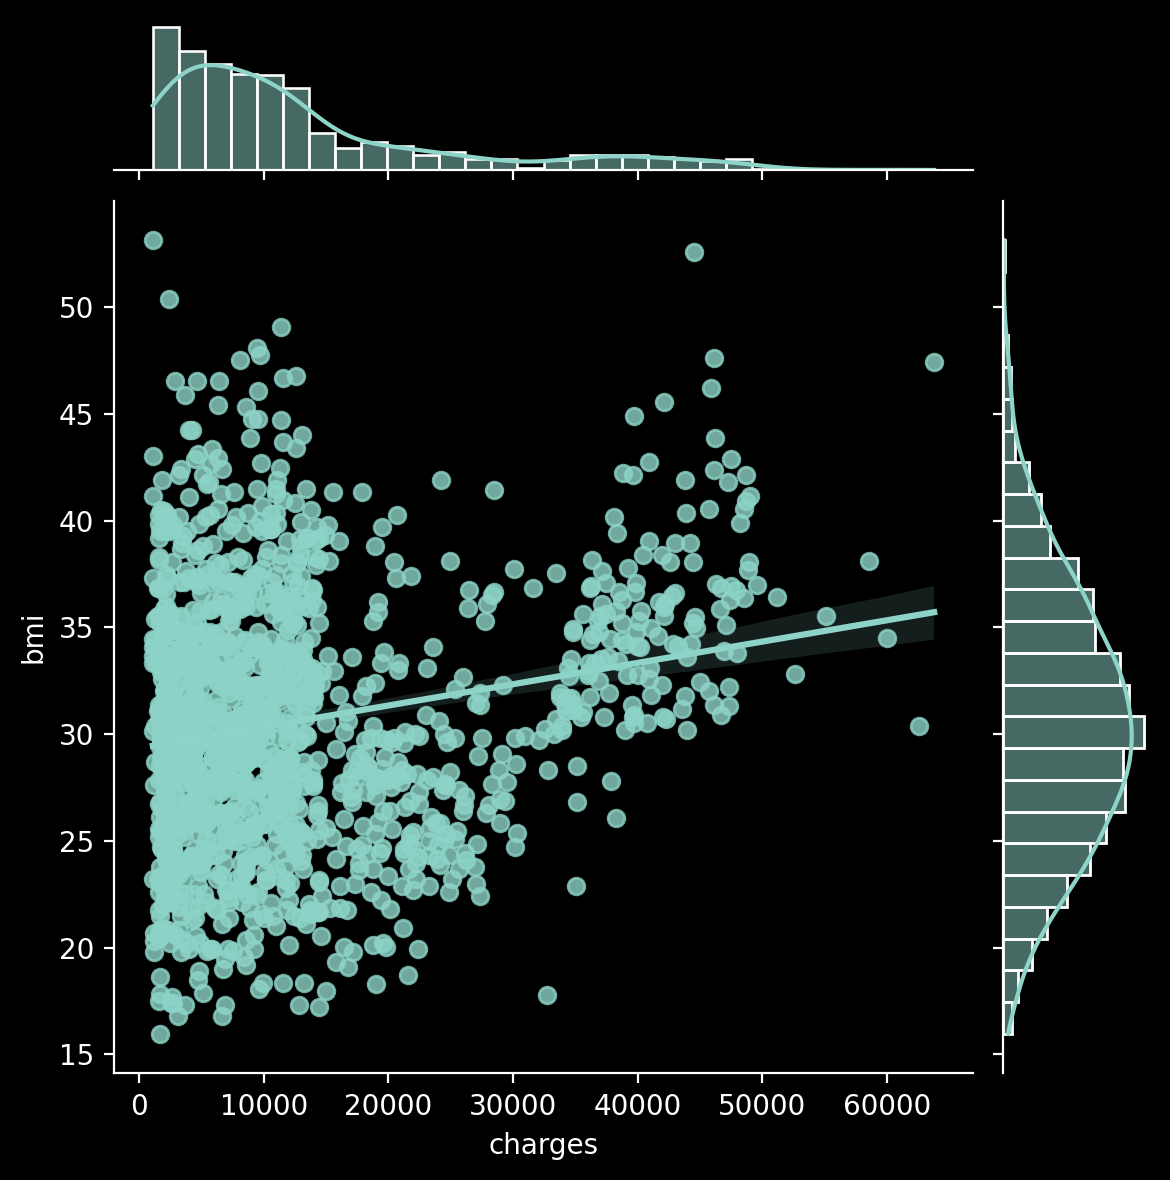

In [26]:
plt.figure(figsize=(10,10))
sns.jointplot(data=insurance,x='charges',y='bmi',kind='reg');

In [27]:
#The relationship between children and Charges

<Figure size 1000x1000 with 0 Axes>

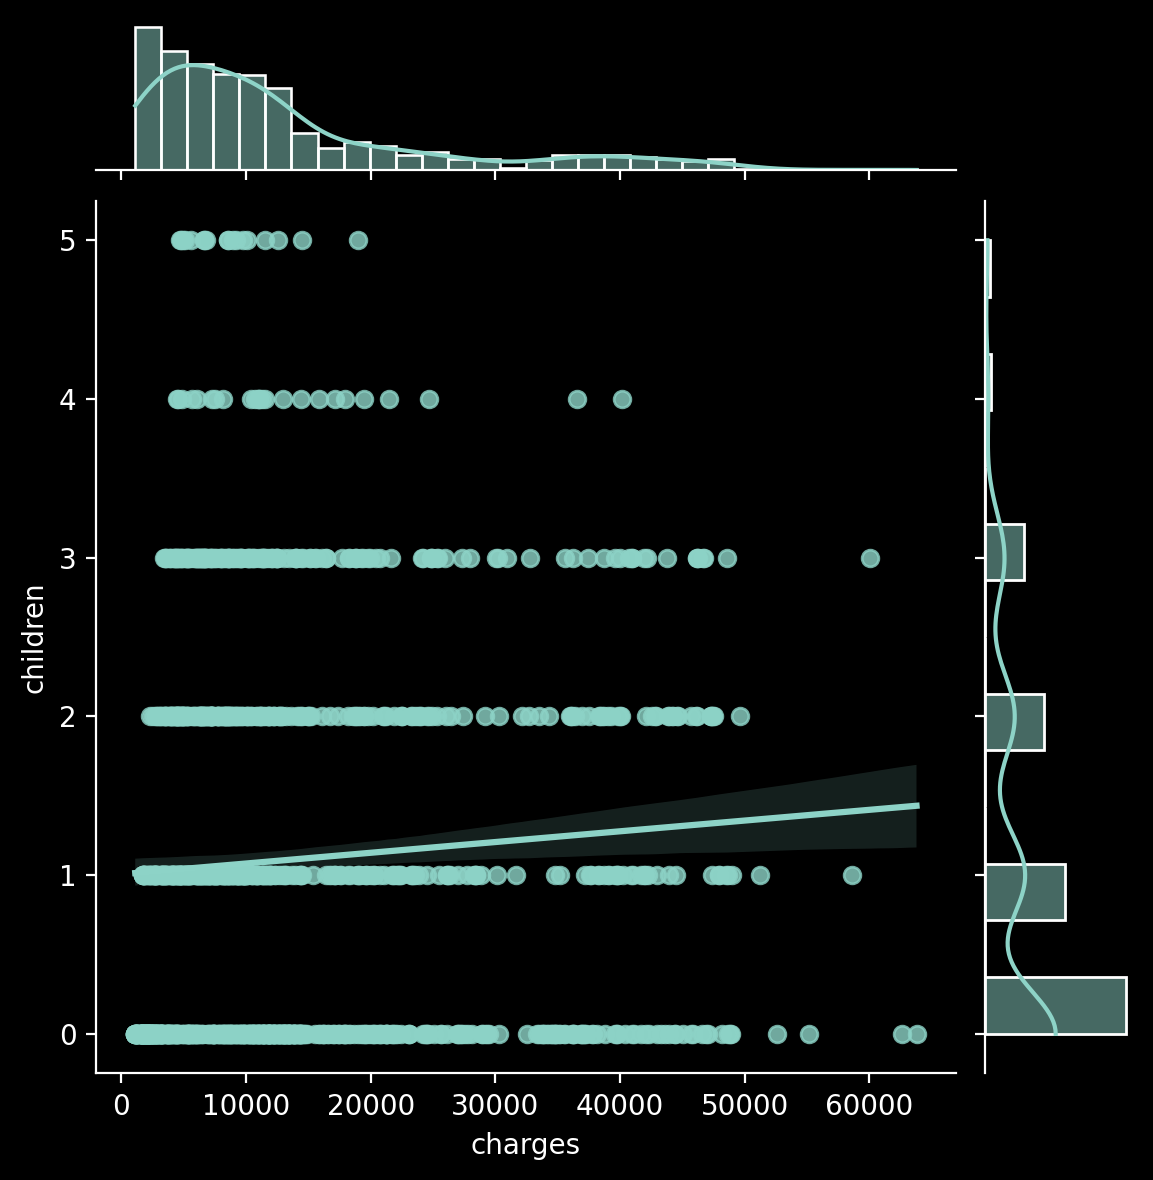

In [28]:
plt.figure(figsize=(10,10))
sns.jointplot(data=insurance,x='charges',y='children',kind='reg');

In [29]:
#The relationship between smoker and Charges

<Figure size 1000x1000 with 0 Axes>

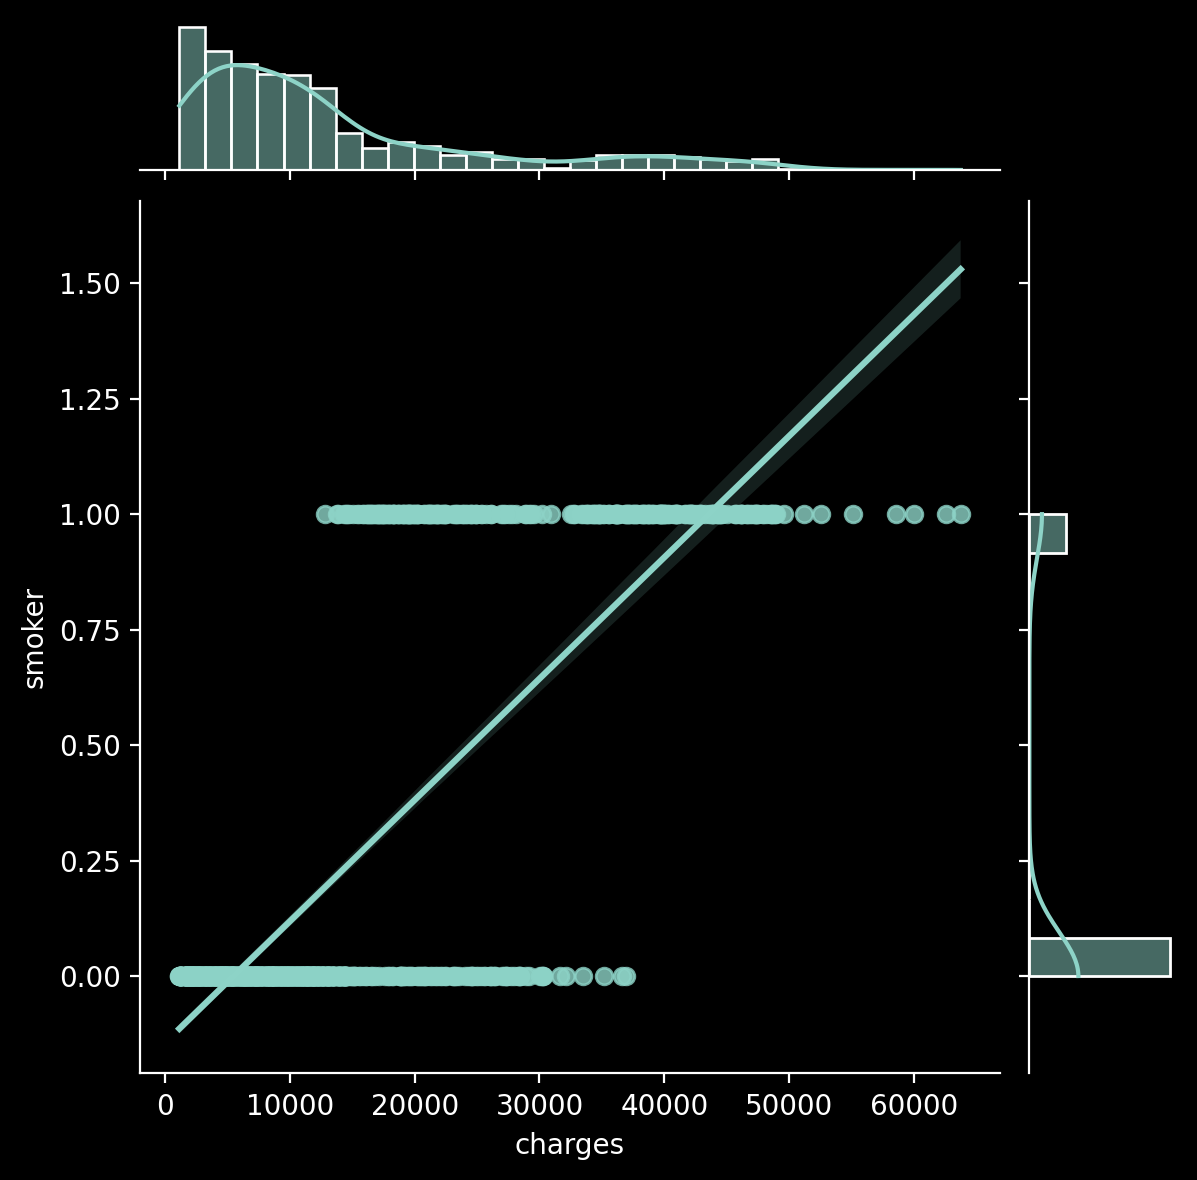

In [30]:
plt.figure(figsize=(10,10))
sns.jointplot(data=insurance,x='charges',y='smoker',kind='reg');

In [31]:
#The relationship between region and Charges

<Figure size 1000x1000 with 0 Axes>

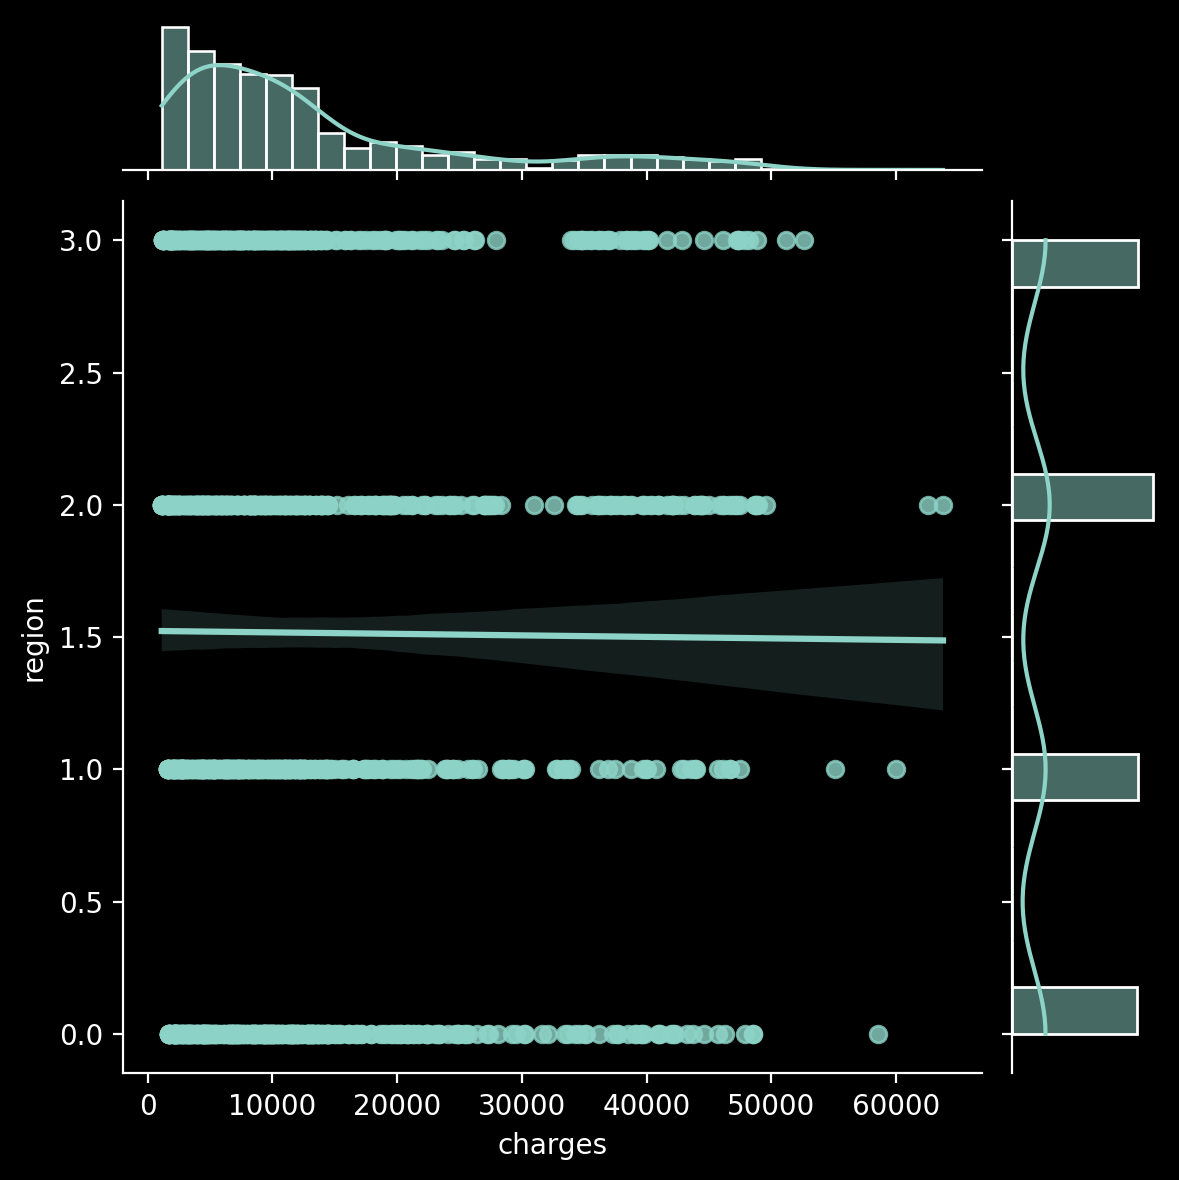

In [32]:
plt.figure(figsize=(10,10))
sns.jointplot(data=insurance,x='charges',y='region',kind='reg');

In [33]:
#Training & Testing Split

In [34]:
x = insurance.drop('charges',axis=1)
y = insurance['charges']

In [35]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [36]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [37]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=23)

In [38]:
x_train.shape

(1204, 6)

In [39]:
x_test.shape

(134, 6)

In [40]:
y_train.shape

(1204,)

In [41]:
y_test.shape

(134,)

In [42]:
#Model Training

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(x_train,y_train)

LinearRegression()

In [45]:
predictions = lm.predict(x_test)
predictions

array([11922.93619228,  6336.15974008, 30910.28170456, 10121.3026477 ,
        8053.09788409,  9451.58093572, 35396.97810152,  8417.21694427,
       13230.02650658, 39193.43825626,  1727.10287096, 36602.11927824,
        4099.87682595, 12589.14592002,  8367.70050046,  5376.23246516,
        5535.34267752,  3452.19472673, 34965.18178785, 32704.34280226,
       38656.30206044, 13423.04053061,  8237.06663779, 10134.14783904,
       35445.9442389 ,  7109.76514502,  5336.86538111, 28582.59319181,
         596.74609911, 11590.35771654, 14043.29917849,  4996.85297108,
        3935.30154776, 12361.07731343,  9088.98019101, 28733.07089718,
       11318.0767983 , 10692.97574989,  9926.30022491,  4442.31489691,
       11020.60546058, 33607.46418399, 11335.89296657, 31346.90356435,
       11638.73984943, 13803.47051428,  4471.37759598,  5350.32343423,
        9034.62747526,  5296.56240174, 13793.05732185,  9127.43624393,
       10732.81395059,  5780.24131185,  6221.72284507, 14763.78706374,
      

In [46]:
real_values = np.array(y_test)#real_values
real_values

array([13041.921  ,  5031.26955, 20984.0936 , 25656.57526,  3201.24515,
        7256.7231 , 41999.52   , 12404.8791 , 14001.1338 , 47269.854  ,
        2597.779  , 29330.98315,  2741.948  , 14256.1928 ,  6238.298  ,
        4746.344  ,  6652.5288 ,  2250.8352 , 41676.0811 , 39836.519  ,
       47928.03   ,  7650.77375,  6457.8434 , 11837.16   , 42211.1382 ,
        4837.5823 ,  4894.7533 , 36219.40545,  2201.0971 ,  8556.907  ,
       12644.589  ,  2473.3341 ,  4032.2407 , 13224.693  ,  5584.3057 ,
       19350.3689 , 12479.70895,  7261.741  , 30284.64294,  3537.703  ,
       11165.41765, 40003.33225, 10264.4421 , 21098.55405, 11554.2236 ,
        9880.068  ,  4340.4409 ,  4435.0942 , 26140.3603 , 27375.90478,
       11674.13   ,  6338.0756 ,  9724.53   ,  3443.064  ,  3490.5491 ,
       10579.711  , 10602.385  ,  8527.532  ,  7325.0482 , 33475.81715,
       35491.64   ,  4076.497  ,  1137.4697 ,  3943.5954 ,  2523.1695 ,
        5469.0066 , 14133.03775,  1141.4451 ,  4133.64165, 26125

In [47]:
lm.coef_

array([  252.38610459,  -124.98954589,   343.87667983,   518.58888583,
       23531.90926155,  -421.15667231])

In [48]:
lm.intercept_

-11906.468541660739

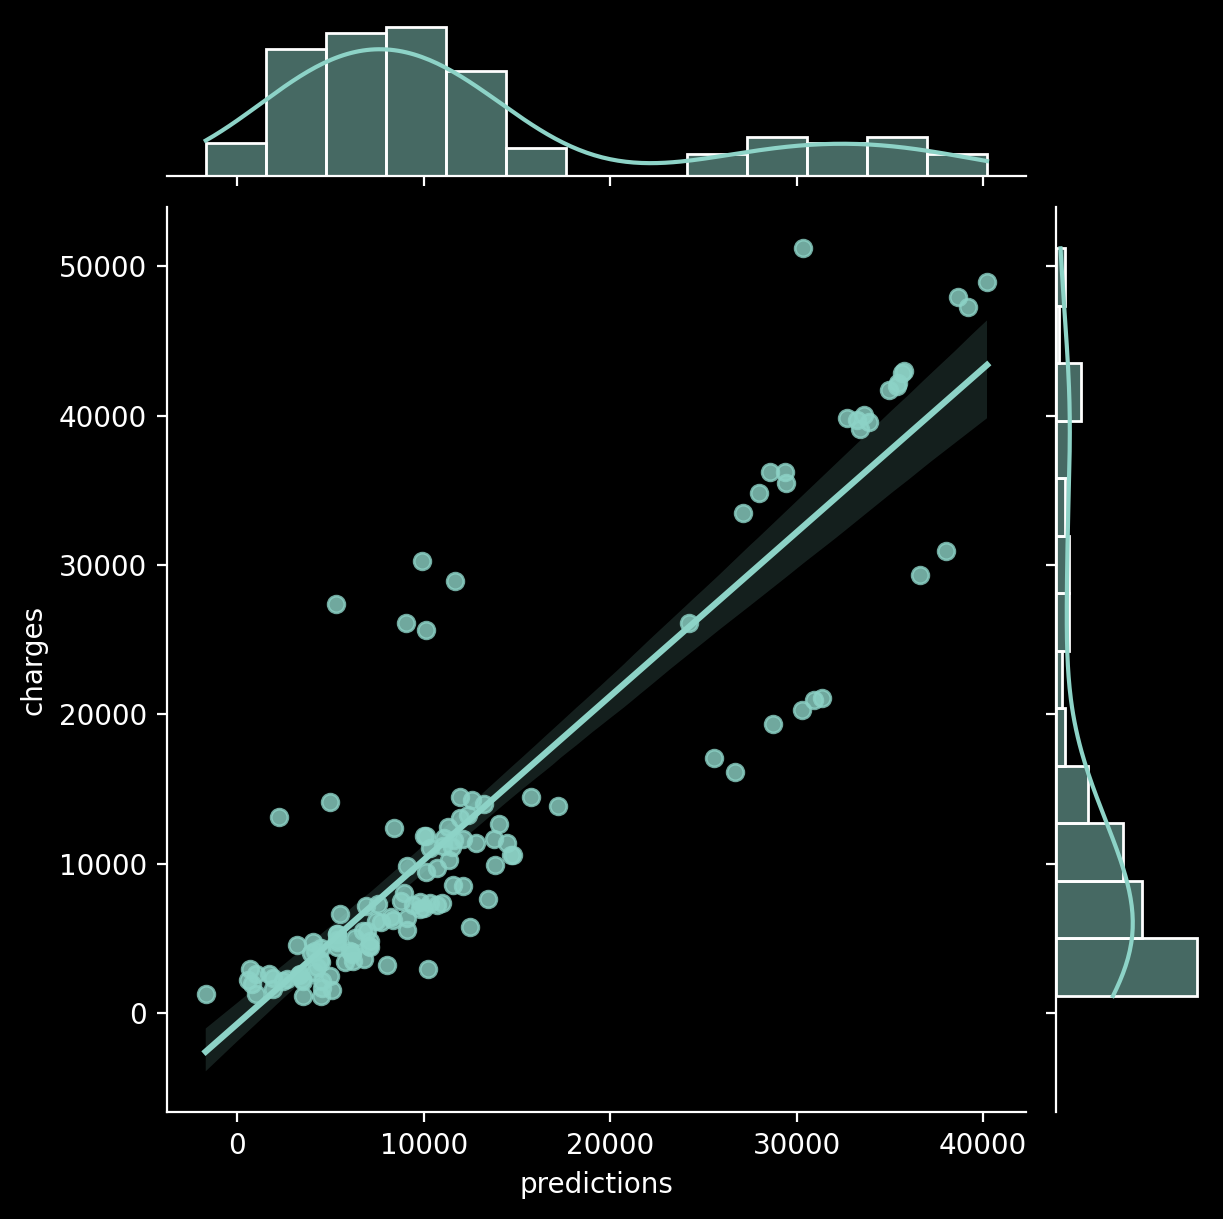

In [49]:
sns.jointplot(x=predictions,y=y_test,kind='reg');
plt.xlabel('predictions');

<ipython-input-50-777543541747>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions));


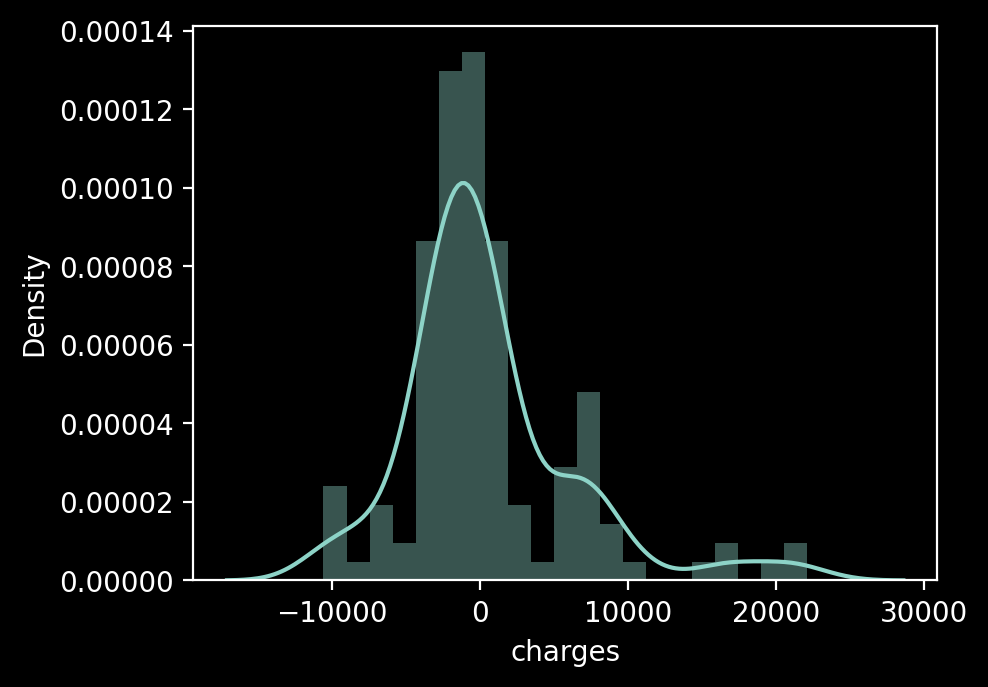

In [50]:
sns.distplot((y_test-predictions));

In [51]:
metrics.mean_absolute_error(y_test,predictions)#MAE

3859.1611647464297

In [52]:
metrics.mean_squared_error(y_test,predictions)#MSE

33469010.52358389

In [53]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))#RMSE

5785.240748973537

In [54]:
metrics.r2_score(y_test,predictions)#R^2

0.8064598346762053